# Demo Preprocessing audio

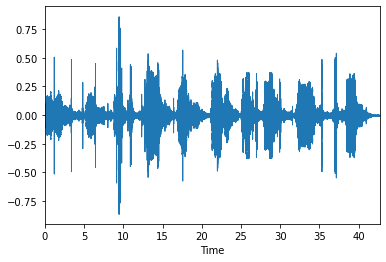

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

filename = 'Haunting_song_of_humpback_whales.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr)

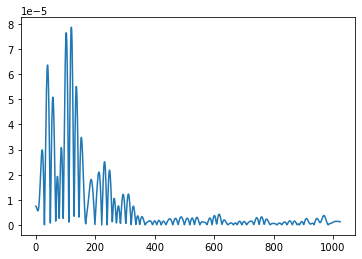

In [3]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
plt.plot(D)

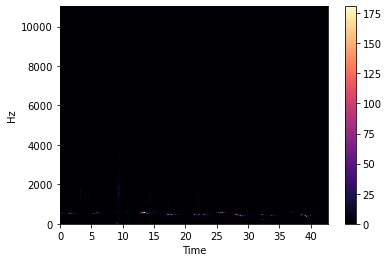

In [9]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  
                        hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

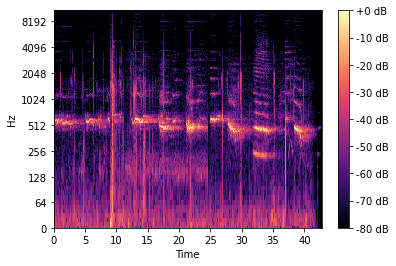

In [10]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

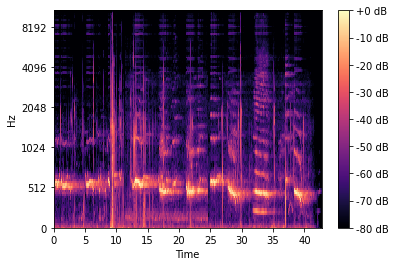

In [8]:
n_mels = 128
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

## Load Model ConvNet

In [4]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2916 - accuracy: 0.9157
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1454 - accuracy: 0.9567
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1075 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0886 - accuracy: 0.9718
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0739 - accuracy: 0.9765


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0385 - accuracy: 0.9771


[0.07433907453664579, 0.9771]